# **SPOTIFY WRAPPED: EXPLORATORY DATA ANALYSIS**


In this project, I examine my personal Spotify streaming history. Spotify is recognized as one of the most popular music streaming platforms worldwide. The dataset used for this analysis consists of my individual usage records on the platform.

This dataset reveals insights into:

* The songs I’ve played
* The artists I’ve listened to
* The total time spent streaming, among other details

I obtained this dataset by requesting my streaming data from Spotify’s ‘Privacy Settings’ section. Spotify allows users to request and download their personal usage information, a process that can take up to 30 days to complete. In my case, I received the full dataset within 23 days, although it can take the full 30 days. With this dataset, I intend to analyze my listening trends and uncover valuable insights.

### **DOWNLOADING YOUR SPOTIFY DATA**


To download a copy of most of your personal data from Spotify, use the automated Download your data function in the Privacy Settings section of your account page.

Steps to Download the Dataset:
1. Visit the `Privacy Settings` page on your Spotify account.
2. Scroll down to the `Download Your Data` section.
3. Follow the three-step process outlined there to request your data.
4. After requesting, Spotify will send you a confirmation email to verify the request.
5. Once confirmed, Spotify will prepare a `Zip File` containing your data and send you an email with the download `link`.
6. If you don't see the email, you can initiate the request again from the `Privacy Settings` page.

For more details, visit: Spotify Data Rights and Privacy Settings

### **IMPORTING ESSENTIAL LIBRARIES FOR DATA ANALYSIS**

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


### **LOADING AND READING DATA**

Spotify data is provided in individual JSON files for each year, which can make it difficult to work with as separate datasets. To facilitate better analysis and improve accessibility, we need to combine all these yearly datasets into one unified file. Once merged, we will convert the consolidated data into a CSV format, which is more user-friendly and easier to work with for further analysis and processing.

In [3]:
# df1 = pd.read_json("Streaming_History_Audio_2021-2022_1")  # Read the first JSON file
# df2 = pd.read_json("Streaming_History_Audio_2022-2023_2")  # Read the second JSON file
# df3 = pd.read_json("Streaming_History_Audio_2023-2024_3")  # Read the third JSON file
# df4 = pd.read_json("Streaming_History_Audio_2024_4")  # Read the fourth JSON file

# spotify_df = pd.concat([df1, df2, df3, df4], ignore_index=True)  # Merge all DataFrames

# spotify_df.to_csv("Streaming_History_Audio_2018-2024x.csv")  # Save as CSV



I handled the merging of the data and the format conversion as separate steps to ensure clarity and organization in the process. That's why these actions are placed in a commented block, indicating that they were done independently

In [4]:
df=pd.read_csv("Streaming_History_Audio_2018-2024.csv")

In [5]:
df.head(3)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2018-09-14T11:38:13Z,02wb9twnrauxcgyjaae5pwr4z,"iOS 11.4.1 (iPhone9,1)",24170,NL,77.163.157.48,unknown,3500 (feat. Future & 2 Chainz),Travis Scott,Rodeo,...,NaN,NaN,NaN,clickrow,endplay,False,NaN,False,1536925068563,False
1,2018-09-14T11:38:57Z,02wb9twnrauxcgyjaae5pwr4z,"iOS 11.4.1 (iPhone9,1)",39488,NL,77.163.157.48,unknown,Saucy Alie,J Styles,Saucy Alie,...,NaN,NaN,NaN,clickrow,endplay,False,NaN,False,1536925092953,False
2,2018-09-14T11:39:06Z,02wb9twnrauxcgyjaae5pwr4z,"iOS 11.4.1 (iPhone9,1)",3391,NL,77.163.157.48,unknown,Sociopath,StayLoose,Sociopath,...,NaN,NaN,NaN,clickrow,endplay,False,NaN,False,1536925136657,False


In [6]:
df.tail(3)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
80805,2024-10-22T15:47:04Z,02wb9twnrauxcgyjaae5pwr4z,ios,1360,GH,154.160.18.7,NaN,Uhh Yeahh,Asake,Lungu Boy,...,NaN,NaN,NaN,fwdbtn,fwdbtn,True,1.0,False,1729612023,False
80806,2024-10-22T15:47:05Z,02wb9twnrauxcgyjaae5pwr4z,ios,880,GH,154.160.18.7,NaN,Oppress,DanDizzy,UGLY (U Gatts Love Yourself),...,NaN,NaN,NaN,fwdbtn,backbtn,True,1.0,False,1729612024,False
80807,2024-10-22T15:54:30Z,02wb9twnrauxcgyjaae5pwr4z,ios,204279,GH,154.160.18.7,NaN,Uhh Yeahh,Asake,Lungu Boy,...,NaN,NaN,NaN,backbtn,trackdone,True,0.0,False,1729612025,False


In [7]:
df.shape

(80808, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80808 entries, 0 to 80807
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 80808 non-null  object 
 1   username                           80808 non-null  object 
 2   platform                           80808 non-null  object 
 3   ms_played                          80808 non-null  int64  
 4   conn_country                       80808 non-null  object 
 5   ip_addr_decrypted                  80808 non-null  object 
 6   user_agent_decrypted               68370 non-null  object 
 7   master_metadata_track_name         79385 non-null  object 
 8   master_metadata_album_artist_name  79385 non-null  object 
 9   master_metadata_album_album_name   79385 non-null  object 
 10  spotify_track_uri                  79385 non-null  object 
 11  episode_name                       575 non-null    obj

In [9]:
df.nunique()

ts                                   76936
username                                 1
platform                                29
ms_played                            30712
conn_country                             7
ip_addr_decrypted                     2425
user_agent_decrypted                     8
master_metadata_track_name           14069
master_metadata_album_artist_name     3456
master_metadata_album_album_name      9066
spotify_track_uri                    16448
episode_name                           458
episode_show_name                       49
spotify_episode_uri                    463
reason_start                            10
reason_end                              10
shuffle                                  2
skipped                                  2
offline                                  2
offline_timestamp                    76235
incognito_mode                           2
dtype: int64

### **CLEANING THE DATA**

We have numerous columns in our dataset, some of which are no longer relevant. Therefore, we will create a new dataframe containing only the necessary columns.

In [10]:
al_df = df[['ts', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name']].copy()
al_df.head(3)


,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name
0,2018-09-14T11:38:13Z,24170,3500 (feat. Future & 2 Chainz),Travis Scott
1,2018-09-14T11:38:57Z,39488,Saucy Alie,J Styles
2,2018-09-14T11:39:06Z,3391,Sociopath,StayLoose


**Explanation:**

`df[['ts', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name']]`:

This part selects a subset of columns from the DataFrame `df`. It retrieves only the columns: `ts` (timestamp), `ms_played` (milliseconds played), `master_metadata_track_name` (track name), and `master_metadata_album_artist_name` (album artist name).

`.copy()`:
The `.copy()` method is used to create a new DataFrame `al_df` that is a copy of the selected columns from `df`. This ensures that `al_df` is a completely independent DataFrame, meaning any changes made to `al_df` won't affect the original `df`.

`al_df.head(3)`:
The `.head(3)` function returns the first 3 rows of the `al_df` DataFrame. This is helpful for quickly checking the data that has been copied to ensure it is correct and formatted as expected.

**Summary**:
This code creates a new DataFrame `al_df` containing a subset of columns from the original `df` and displays the first 3 rows of `al_df`. This is useful for data exploration and verifying that the correct columns are present before further analysis.




 **Now, convert the `ts` column to datetime format.**

In [11]:
al_df['ts'] = pd.to_datetime(al_df['ts'])

# Change the format of the timestamps
al_df['ts'] = al_df['ts'].dt.strftime('%Y-%m-%d %H:%M')

# Print the updated DataFrame
al_df.sample(10)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name
23646,2021-11-08 17:38,159950,One Love,Omar Sterling
10033,2019-03-21 12:54,75534,Street Fighter Riddim,D Double E
40501,2022-11-28 04:17,1258,Letter to Takeoff,Gucci Mane
13117,2021-04-13 11:45,111502,Street Fighter Riddim,D Double E
55493,2023-09-10 05:15,50919,Protocol,Skeng
48650,2023-05-24 14:47,118500,Meh,Playboi Carti
46545,2023-05-05 07:35,1295321,NaN,NaN
47950,2023-05-16 17:34,143283,Can't Feel My Face,Unodavid
28997,2022-03-01 18:44,201080,Punnany,Admiral Bailey
64015,2024-02-05 16:12,137416,One in Town,Bad Boy Timz


In [12]:
len(al_df["master_metadata_album_artist_name"].unique()) # Length of unique artist

3457

In [13]:
len(al_df["master_metadata_track_name"].unique()) # Length of unique tracks

14070

* al_df["master_metadata_album_artist_name"]: This accesses the column `master_metadata_album_artist_name` from the `al_df` DataFrame.

* .unique(): This method returns an array of unique values from the column, i.e., it filters out duplicate artist names.

* len(): This function calculates the length (number of elements) in the array of unique artists.

### **FORMATTING THE DATA**


Formatting time data, such as `2018-09-14T11:39:06Z`, often involves converting it into a more readable or usable format. This particular timestamp follows the ISO 8601 standard, representing the date and time with a "T" separator between them and a "Z" indicating UTC time. Depending on the analysis needs, you might need to convert it into different formats, such as separating the date and time into distinct columns, converting it to a specific timezone, or extracting components like the year, month, day, hour, or minute. Data formatting is a critical step in ensuring that time-related data is consistent and easy to analyze.


* **Create a new column called `Play-Time`, which will contain the converted datetime values from the `ts` column.**

In [14]:
al_df["Play-Time"]= pd.to_datetime(al_df["ts"]) # To create a additional column

* **Extracting Year, Month, Day, Weekday, and More from Timestamps**

In [15]:
al_df["year"] = al_df["Play-Time"].dt.year
al_df["month"] = al_df["Play-Time"].dt.month
al_df["day"] = al_df["Play-Time"].dt.day
al_df["weekday"] = al_df["Play-Time"].dt.weekday
al_df["time"] = al_df["Play-Time"].dt.time
al_df["hours"] = al_df["Play-Time"].dt.hour
al_df["day-name"] = al_df["Play-Time"].dt.day_name()
al_df["Count"] = 1


* **Next line adds a new column, "Time-Played (hh-mm-ss)," to the al_df DataFrame, converting the millisecond durations in ms_played into a readable format displaying hours, minutes, and seconds.**

In [16]:
al_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(al_df["ms_played"], unit='ms')

* **This code adds columns to al_df for listening time in hours and minutes, calculated from a timedelta column and rounded to three decimal places.**

In [17]:
def hours(td):
    # To get the hour information
    return td.seconds/3600

def minutes(td):
    # To get the minutes information
    return (td.seconds/60)%60

al_df["Listening Time(Hours)"] = al_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
al_df["Listening Time(Minutes)"] = al_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

In [18]:
al_df.head() # To check the newly formed dataset with additional columns

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
0,2018-09-14 11:38,24170,3500 (feat. Future & 2 Chainz),Travis Scott,2018-09-14 11:38:00,2018,9,14,4,11:38:00,11,Friday,1,0 days 00:00:24.170000,0.007,0.400
1,2018-09-14 11:38,39488,Saucy Alie,J Styles,2018-09-14 11:38:00,2018,9,14,4,11:38:00,11,Friday,1,0 days 00:00:39.488000,0.011,0.650
2,2018-09-14 11:39,3391,Sociopath,StayLoose,2018-09-14 11:39:00,2018,9,14,4,11:39:00,11,Friday,1,0 days 00:00:03.391000,0.001,0.050
3,2018-09-14 11:39,2666,Crooked Smile (feat. TLC),J. Cole,2018-09-14 11:39:00,2018,9,14,4,11:39:00,11,Friday,1,0 days 00:00:02.666000,0.001,0.033
4,2018-09-14 11:39,1834,STARGAZING,Travis Scott,2018-09-14 11:39:00,2018,9,14,4,11:39:00,11,Friday,1,0 days 00:00:01.834000,0.000,0.017


* **There are now several columns in the DataFrame, and some of them are no longer required. Let's remove the unnecessary ones to simplify the dataset.**

In [19]:
# Drop columns, excluding "Play-Time"
al_df.drop(columns=["ts", "Time-Played (hh-mm-ss)", "ms_played"], inplace=True)




In [20]:
al_df.tail(4)

,master_metadata_track_name,master_metadata_album_artist_name,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Listening Time(Hours),Listening Time(Minutes)
80804,Yie Yie,Okese1,2024-10-22 15:47:00,2024,10,22,1,15:47:00,15,Tuesday,1,0.000,0.017
80805,Uhh Yeahh,Asake,2024-10-22 15:47:00,2024,10,22,1,15:47:00,15,Tuesday,1,0.000,0.017
80806,Oppress,DanDizzy,2024-10-22 15:47:00,2024,10,22,1,15:47:00,15,Tuesday,1,0.000,0.000
80807,Uhh Yeahh,Asake,2024-10-22 15:54:00,2024,10,22,1,15:54:00,15,Tuesday,1,0.057,3.400


In [21]:
al_df.describe() # Final check for any abnormality

,Play-Time,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,80808,80808.000000,80808.000000,80808.000000,80808.000000,80808.000000,80808.0,80808.000000,80808.000000
mean,2022-07-23 18:25:53.070982912,2022.033041,6.820797,15.885123,2.831824,12.575079,1.0,0.037079,2.128351
min,2018-09-14 11:38:00,2018.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2021-09-11 04:58:45,2021.000000,4.000000,8.000000,1.000000,7.000000,1.0,0.002000,0.150000
50%,2022-11-24 05:22:00,2022.000000,7.000000,16.000000,3.000000,14.000000,1.0,0.038000,2.300000
75%,2023-12-03 08:15:30,2023.000000,10.000000,23.000000,4.000000,18.000000,1.0,0.052000,3.150000
max,2024-10-22 15:54:00,2024.000000,12.000000,31.000000,6.000000,23.000000,1.0,2.452000,59.950000
std,NaN,1.763246,3.302788,8.802176,1.876740,6.577434,0.0,0.066454,2.733124


#### **_Note: Now that we have a clean and properly formatted dataset, we can proceed with our analysis._**


### **ARTIST EXPLORATION**



* **Let's calculate the percentage of unique artits in our data.**

In [22]:
unique_artists = al_df["master_metadata_album_artist_name"].nunique() # Count number of unique artist in dataset
total_artists = al_df["master_metadata_album_artist_name"].count() # Count total artist in dataset
unique_artist_percentage = unique_artists/total_artists*100 # Get the percentage of the unique
unique_artist_percentage

np.float64(4.353467279712793)

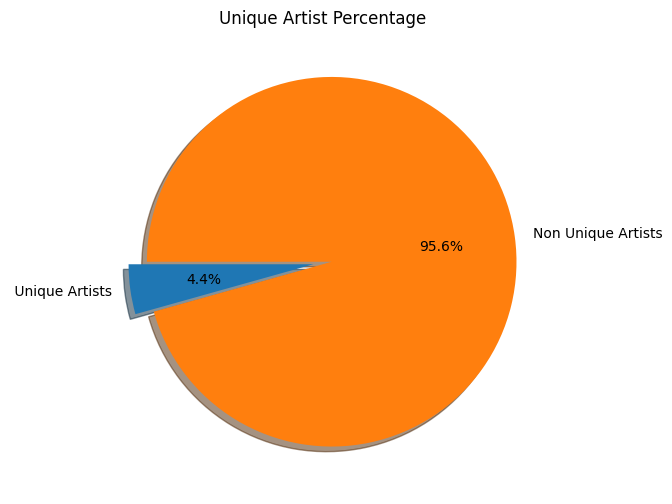

In [23]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists])
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage")
plt.show()

* **We can also identify the top 10 unique artists in our data based on hours.**

In [24]:
top_10_artist_df = al_df.groupby(["master_metadata_album_artist_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
master_metadata_album_artist_name,,,
ODUMODUBLVCK,104.792,6287.899,2926
NSG,82.305,4938.604,1829
Playboi Carti,67.012,4022.180,2056
Kanye West,64.054,3844.811,1654
R2Bees,61.208,3674.920,1618
Omar Sterling,52.018,3119.525,1471
Skillibeng,49.048,2943.997,1385
Sheck Wes,41.262,2475.879,994
Vybz Kartel,37.391,2243.869,1129


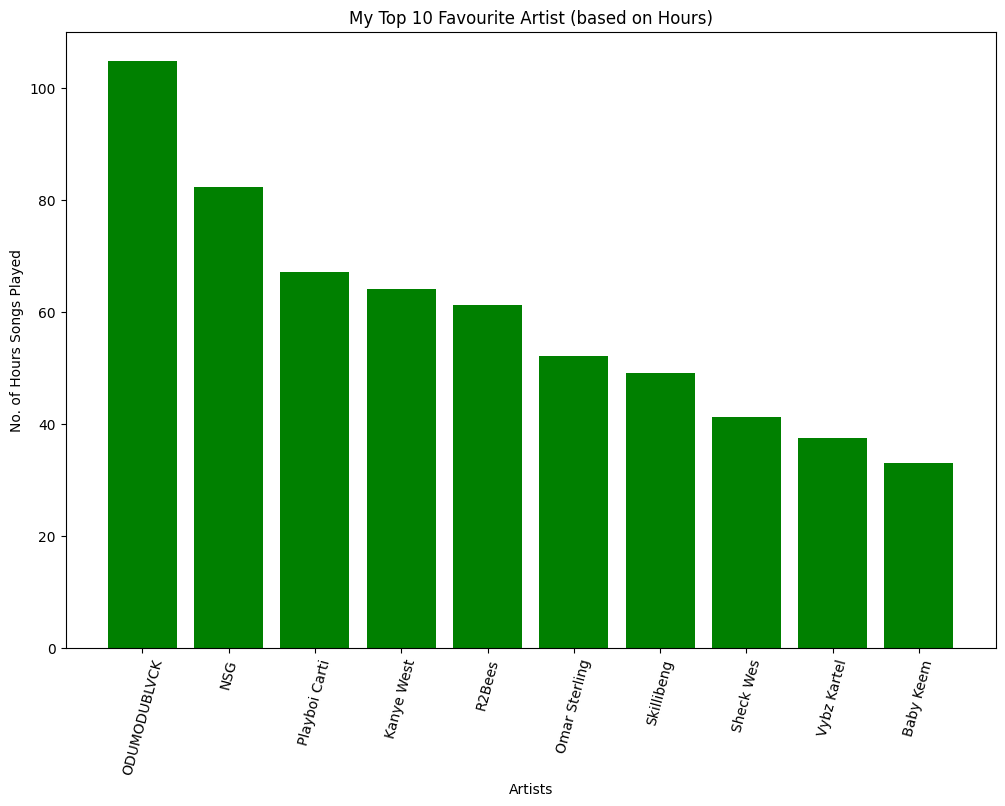

In [25]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_df.head(10).index,top_10_artist_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=75);

* **We can now identify the top 10 unique artists based on their count.**

In [26]:
top_10_artist_count_df = al_df.groupby(["master_metadata_album_artist_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
master_metadata_album_artist_name,,,
ODUMODUBLVCK,104.792,6287.899,2926
Playboi Carti,67.012,4022.180,2056
NSG,82.305,4938.604,1829
Kanye West,64.054,3844.811,1654
R2Bees,61.208,3674.920,1618
Omar Sterling,52.018,3119.525,1471
Skillibeng,49.048,2943.997,1385
Vybz Kartel,37.391,2243.869,1129
Sheck Wes,41.262,2475.879,994


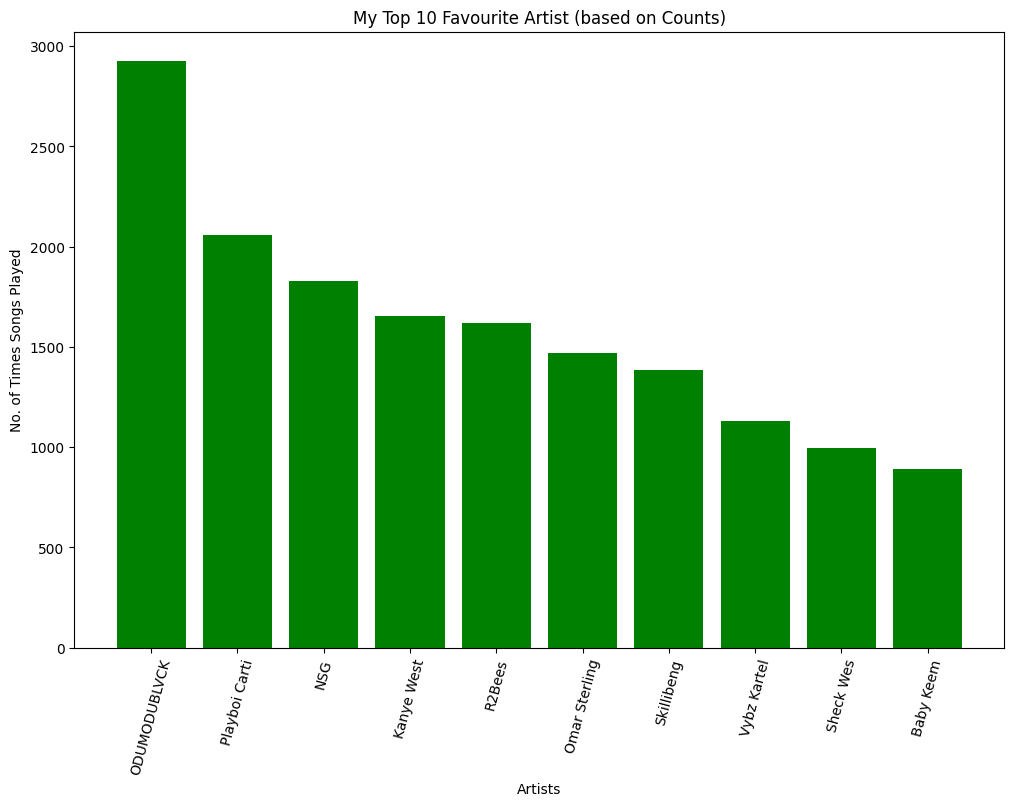

In [27]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=75);

### **SONG TRACKS EXPLORATION**

* **We can calculate the percentage of unique songs in our dataset.**

In [28]:
unique_songs = al_df["master_metadata_track_name"].nunique()
total_songs = al_df["master_metadata_track_name"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

np.float64(17.722491654594698)

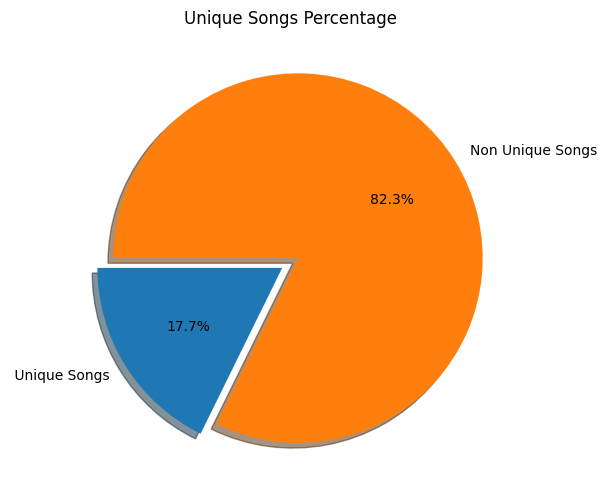

In [29]:
unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

* **We can also identify the top 10 unique songs in our dataset.**

In [30]:
top_10_songs_time_df = al_df.groupby(["master_metadata_track_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = al_df.groupby(["master_metadata_track_name"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

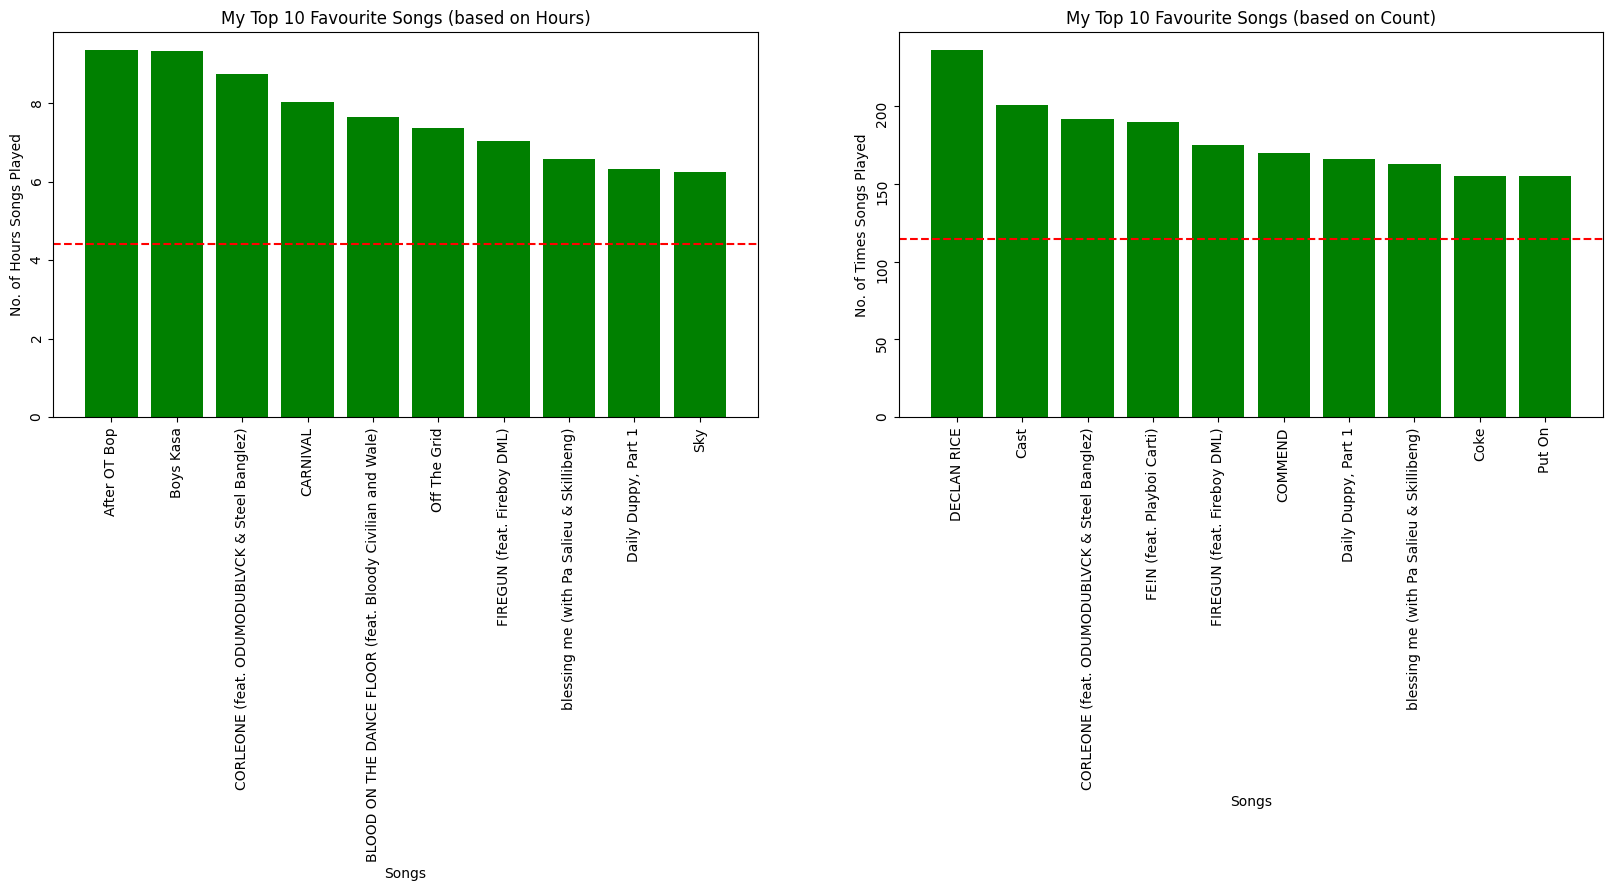

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Songs (based on Hours)",xlabel="Songs",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

# second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="green")
ax2.set(title="My Top 10 Favourite Songs (based on Count)",xlabel="Songs",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r");

### **'USAGE BY DAY' EXPLORATION**

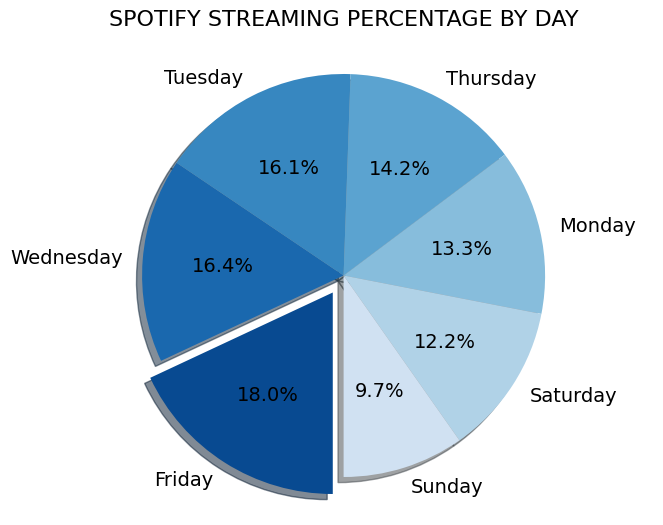

In [32]:
import matplotlib.cm as cm

day_name_counts = al_df["day-name"].value_counts()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
colors = cm.Blues(np.linspace(0.9, 0.2, len(day_name_counts)))

# Get the maximum index
max_index = day_name_counts.argmax()

# Create an explode list
explode = [0] * len(day_name_counts)
explode[max_index] = 0.1

# Plot the pie chart
ax.pie(day_name_counts, labels=day_name_counts.index, colors=colors, autopct='%1.1f%%', startangle=-90,
       textprops={'fontsize': 14}, explode=explode, shadow=True, counterclock=False)

# Set the title and axis aspect ratio
ax.set_title('SPOTIFY STREAMING PERCENTAGE BY DAY', pad=20, fontdict={'color': 'black', 'weight': 'normal', 'size': 16})
ax.axis('equal')

plt.show()


### **AVERAGE DAILY USAGE EXPLORATION**

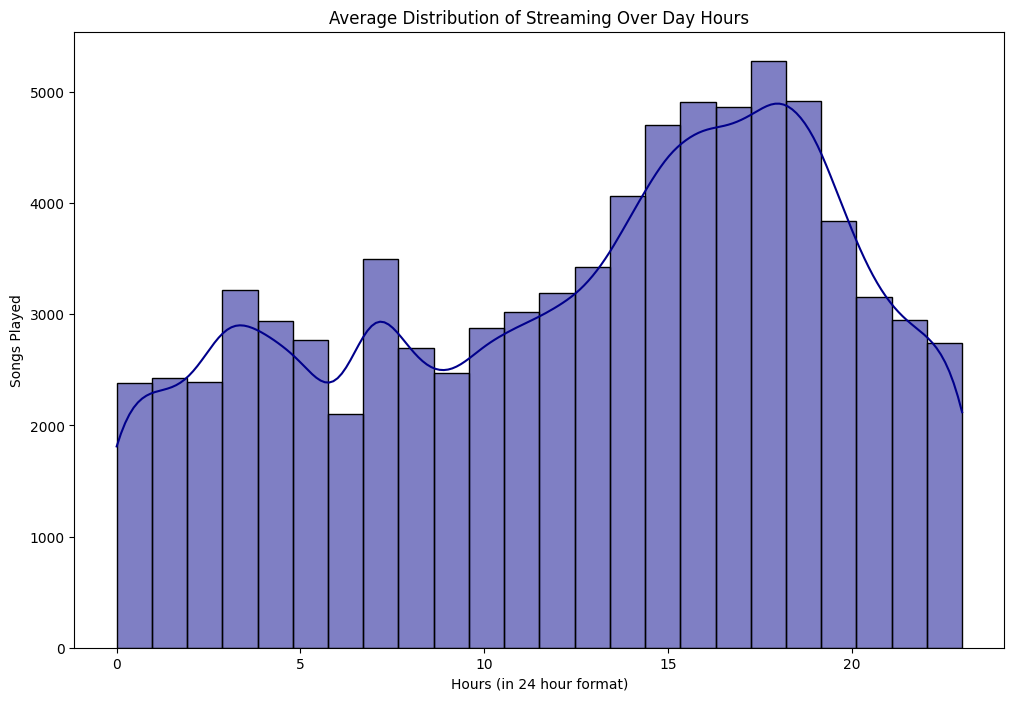

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(al_df["hours"], bins=24,kde=True, color="darkblue");

With this histogram graph we can see about my average usage:

1. Maximum around `6-7 PM` hour mark
2. Minimum around `5-6 AM` hour mark

### **AVERAGE USAGE PER MONTH EXPLORATION**

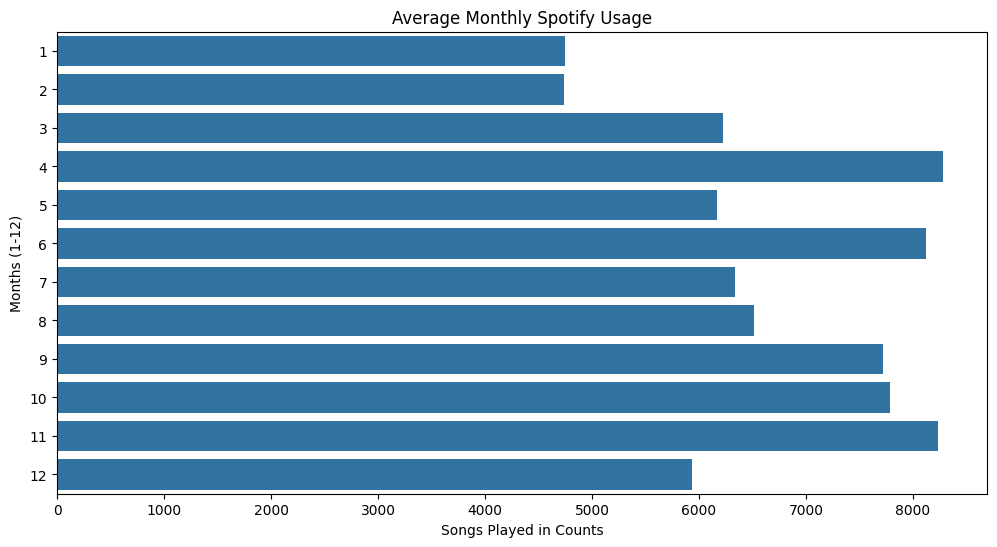

In [34]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=al_df["month"], ax=ax)
ax.set(title="Average Monthly Spotify Usage", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

### **TOTAL HOURS SPENT ON SPOTIFY STREAMING**

* **In this section, we aim to calculate the total hours spent streaming on Spotify since the account was created.**

In [35]:
time_spent_hours = al_df["Listening Time(Hours)"].sum()
time_spent_hours

np.float64(2996.2650000000003)

For this, we can simply sum up all the time spent listening to songs, which totals around **`2996 Hours`**.

### **WHAT'S THE PERCENTAGE OF ACTUAL USAGE COMPARED TO TOTAL POSSIBLE?**

In this section, we aim to determine the percentage of time spent on Spotify.

Although this question may seem a bit unusual, we are essentially calculating what percentage of the maximum possible hours since signup was actually spent streaming on Spotify.


In [36]:
date_df = al_df["Play-Time"]
time_difference = (date_df.iloc[10803] - date_df.iloc[0]) / np.timedelta64(1,"D")
time_difference_hours = time_difference*24
time_difference_hours

21800.6

###  **AVERAGE NUMBER OF SONGS PLAYED DAILY**

In [37]:
total_songs = al_df["master_metadata_track_name"].count()

In [38]:
time_difference

908.3583333333333

In [39]:
average_songs_played_daily = (total_songs / time_difference).round()
average_songs_played_daily

np.float64(87.0)

* **Here we can see that on an average I played **`87`** songs per day.**

### **DAY WITH MAXIMUM SONGS PLAYED (SCATTERPLOT)**

In [40]:
al_df["date"] = al_df["Play-Time"].dt.date # Creating a new column with date

In [41]:
most_songs = al_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(1)

,Count
date,
2022-04-02,401


* **Here, we can see that I played most songs which is `401 Songs` on `2nd April,2022`.**

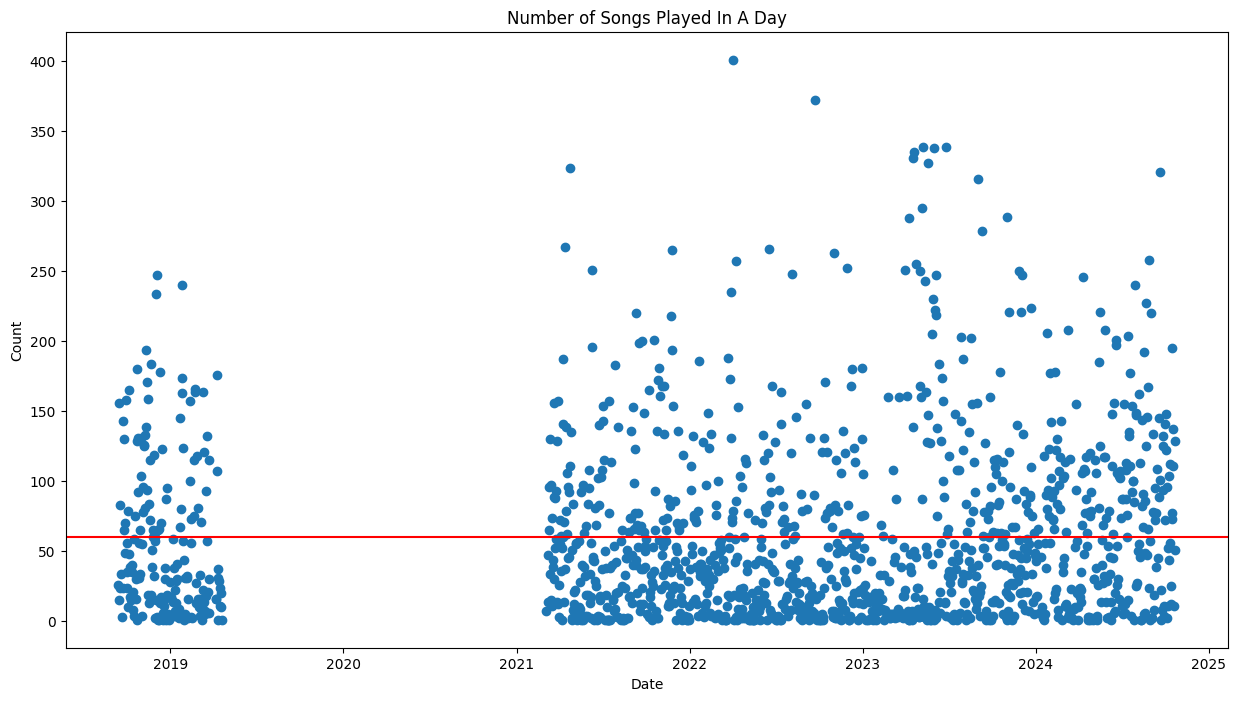

In [42]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Number of Songs Played In A Day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

### **MY 100 FAVORITE ARTISTS IN A WORD CLOUD**

In [43]:
fav_artist = al_df.groupby(["master_metadata_album_artist_name"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

master_metadata_album_artist_name
ODUMODUBLVCK     2926
Playboi Carti    2056
NSG              1829
Kanye West       1654
R2Bees           1618
                 ... 
Tion Wayne        154
Cruel Santino     153
Young Thug        152
Coults            152
Okese1            149
Name: Count, Length: 100, dtype: int64

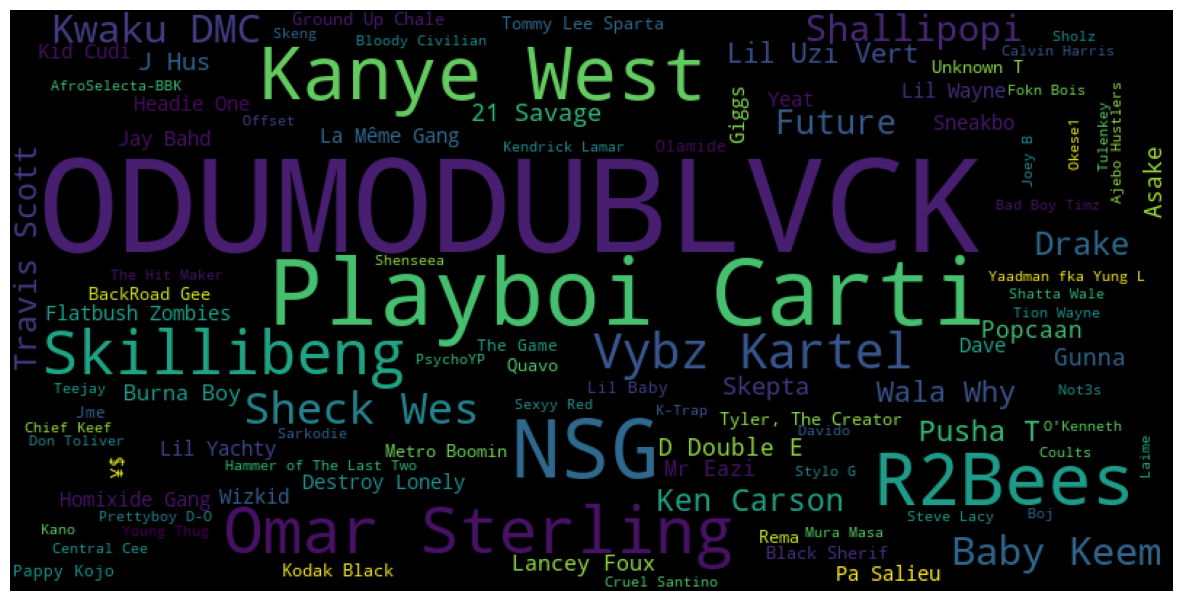

In [44]:
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_artist)
plot_cloud(wordcloud)

### **MY FAVORITE ARTIST PLAYLIST BASED ON SONG COUNT**

In [45]:
my_fav_artist_playlist = al_df.groupby(["master_metadata_album_artist_name","master_metadata_track_name"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)
my_fav_artist_playlist

,,Count
master_metadata_album_artist_name,master_metadata_track_name,
ODUMODUBLVCK,DECLAN RICE,236
Shallipopi,Cast,201
NSG,CORLEONE (feat. ODUMODUBLVCK & Steel Banglez),192
Travis Scott,FE!N (feat. Playboi Carti),190
ODUMODUBLVCK,FIREGUN (feat. Fireboy DML),175
...,...,...
Playboi Carti,Shoota (feat. Lil Uzi Vert),86
LADIPOE,Guy Man,86
Steve Lacy,Static,86


### **MY TOP 100 SONGS IN A WORD CLOUD**

* **To identify my top 100 most listened songs.**

In [46]:
fav_songs = al_df.groupby(["master_metadata_track_name"])["Count"].count()

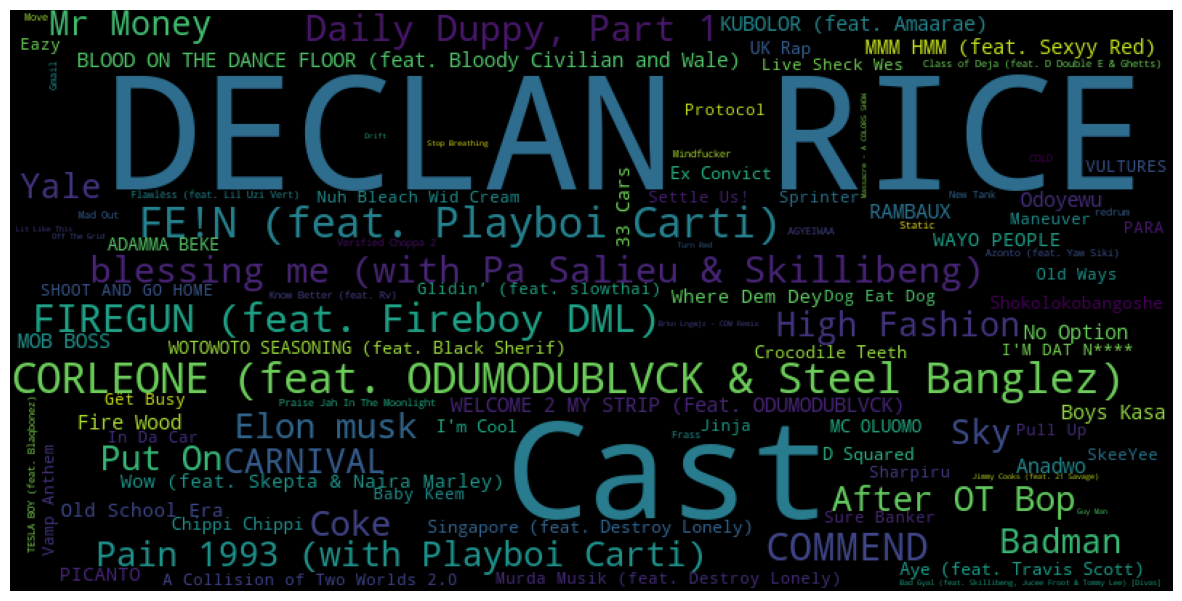

In [47]:
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_songs)
plot_cloud(wordcloud)

### **PEAK USAGE VIA HEATMAP**

In [48]:
active_usage = al_df.groupby(['hours', 'day-name'])['master_metadata_album_artist_name'].size().reset_index(name='count')
active_usage_pivot = active_usage.pivot(index='hours', columns='day-name', values='count')
active_usage_pivot.head()


day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,409,401,297,234,204,411,422
1,330,446,310,201,267,460,413
2,517,325,141,179,288,560,377
3,565,424,333,238,444,617,596
4,544,327,311,160,473,558,565


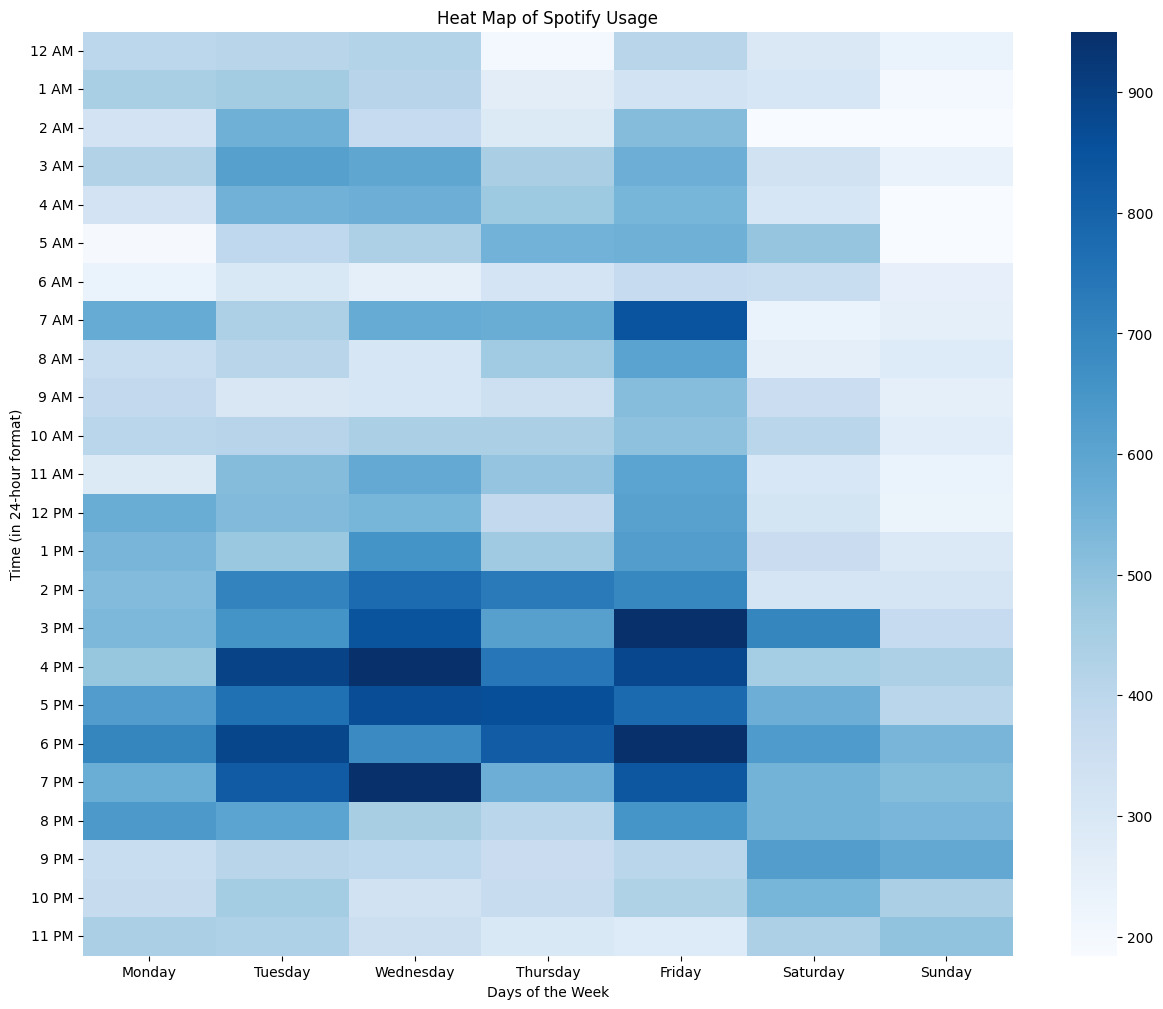

In [49]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax=ax)

# Adjust the title and axis labels
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week", ylabel="Time (in 24-hour format)")

# Convert the y-axis labels (time in 24-hour format) to 12-hour format (AM/PM)
time_ticks = [f"{hour % 12 or 12} {'AM' if hour < 12 else 'PM'}" for hour in range(24)]

# Set the y-tick labels
ax.set_yticklabels(time_ticks, rotation=0)

plt.show()

### **WEEKLY USAGE ANALYSIS VIA COUNTPLOT**

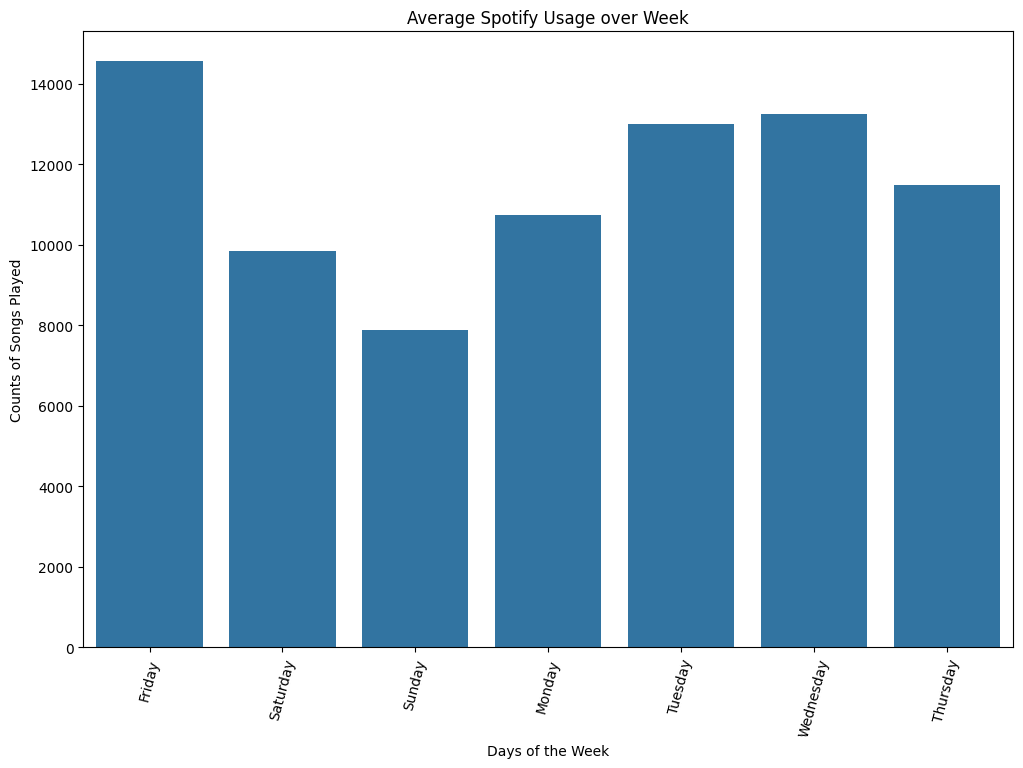

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=al_df["day-name"],ax=ax)
plt.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

### **USAGE DISTRIBUTION BETWEEN WEEKDAYS AND WEEKENDS**

In [51]:
extra_df = al_df.copy()
extra_df['is_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,63075
True,17733


In [52]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend

,Count,Percentage
is_weekend,,
False,63075,78.055391
True,17733,21.944609


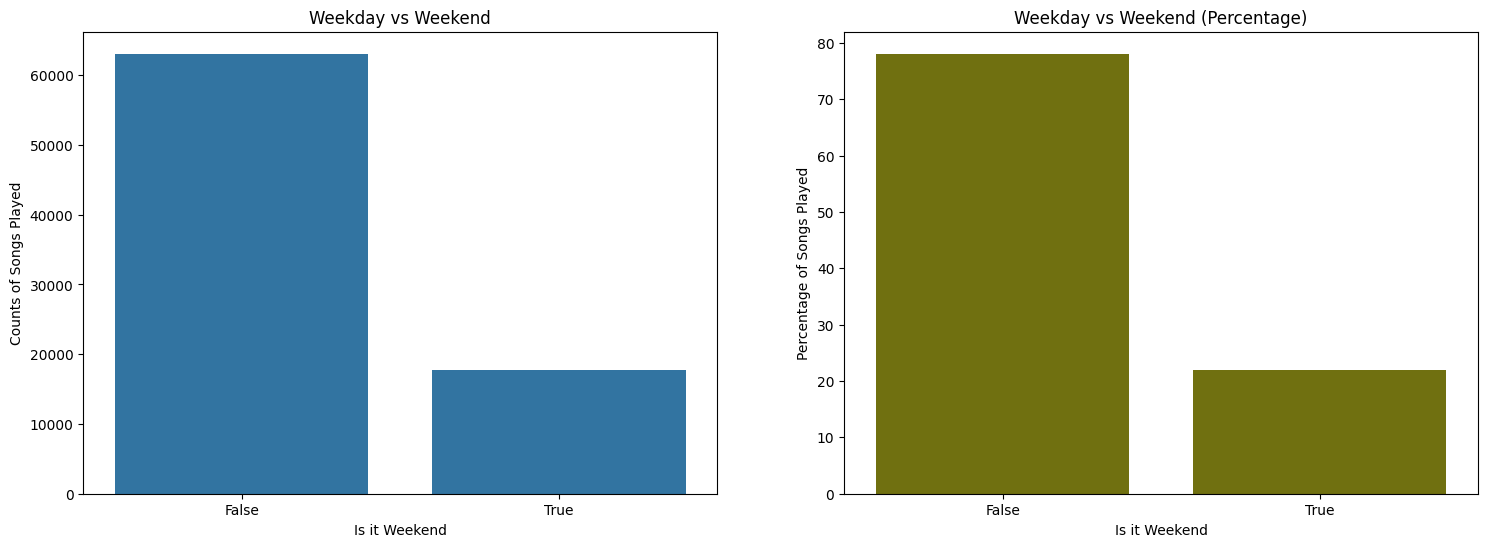

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1 = sns.barplot(x=["False","True"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",xlabel="Is it Weekend",ylabel="Counts of Songs Played");

ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Olive",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");

  `

`




### **_Thank you for exploring this project. The analysis presented here highlights key insights derived from my streaming data, focusing on usage patterns, preferences, and trends over time. I hope it provides a meaningful perspective on how I interact with my music library and helps uncover valuable trends for future improvements._**